In [ ]:
### IMPORTAR LIBRERÍAS ###
import pandas as pd

In [ ]:
### IMPORTAR LOS DATOS ###
data = pd.read_csv('Enfermedades.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Colocar nombres a las columnas
columnas = ['sbp','Tabaco','ldl','Adiposity','Familia','Tipo','Obesidad','Alcohol','Edad','chd']
data.columns=columnas
data.head()

,sbp,Tabaco,ldl,Adiposity,Familia,Tipo,Obesidad,Alcohol,Edad,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [ ]:
#Conocer el formato de los datos
data.dtypes

sbp            int64
Tabaco       float64
ldl          float64
Adiposity    float64
Familia        int64
Tipo           int64
Obesidad     float64
Alcohol      float64
Edad           int64
chd            int64
dtype: object

In [ ]:
#Conocer los datos nulos
data.isnull().sum()

sbp          0
Tabaco       0
ldl          0
Adiposity    0
Familia      0
Tipo         0
Obesidad     0
Alcohol      0
Edad         0
chd          0
dtype: int64

In [ ]:
#Cambiar los datos de Familia y CHD en digitales
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Familia']=encoder.fit_transform(data['Familia'])
data['chd']=encoder.fit_transform(data['chd'])
data.head()

,sbp,Tabaco,ldl,Adiposity,Familia,Tipo,Obesidad,Alcohol,Edad,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [ ]:
#Escalamos los valores de la columna sbp
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))
data.head()

,sbp,Tabaco,ldl,Adiposity,Familia,Tipo,Obesidad,Alcohol,Edad,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


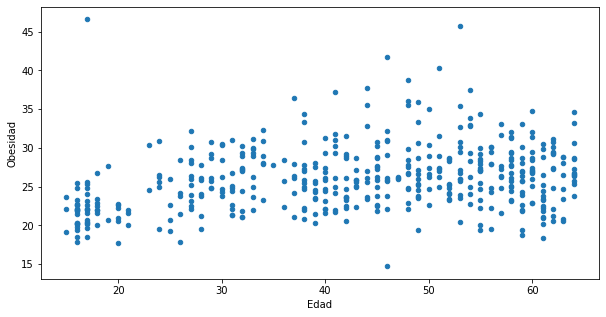

In [ ]:
#Visualizar la obesidad de acuerdo a la edad
data.plot(x='Edad',y='Obesidad',kind='scatter',figsize =(10,5))

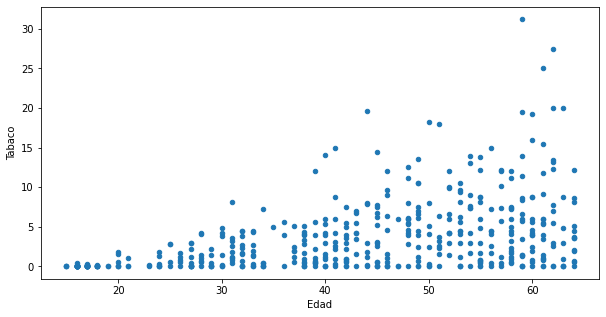

In [ ]:
#Visualizar el consumo de tabaco de acuerdo a la edad
data.plot(x='Edad',y='Tabaco',kind='scatter',figsize =(10,5))

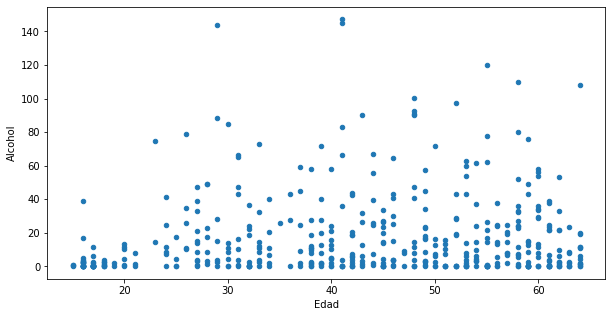

In [ ]:
#Visualizar el consumo de alcohol de acuerdo a la edad
data.plot(x='Edad',y='Alcohol',kind='scatter',figsize =(10,5))

In [ ]:
### ANÁLISIS DE MACHINE LEARNING ###
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
#Definir las variable dependiente e independientes
y = data['chd']
X = data.drop('chd', axis =1)

In [ ]:
#Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [ ]:
#Definir el algoritmo
algoritmo = svm.SVC(kernel ='linear')

In [ ]:
#Entrenar el algoritmo
algoritmo.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Realizar una predicción
y_test_pred = algoritmo.predict(X_test)

In [ ]:
#Se calcula la matriz de confusión
print(confusion_matrix(y_test, y_test_pred))

[[57  9]
 [17 10]]


In [ ]:
#Se calcula la exactitud y precisión del modelo
accuracy_score(y_test, y_test_pred)

0.7204301075268817

In [ ]:
precision_score(y_test, y_test_pred)

0.5263157894736842